In [1]:
%pylab inline
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
#imports the own created package
import clustering as cl
import warnings
warnings.filterwarnings('ignore')


Populating the interactive namespace from numpy and matplotlib


## Team Results of actual Season Top Leagues: Germany, Italy, France, England and Spain

In [2]:
def country_df(csv):
    df = pd.read_csv(csv)
    df.sort_values('team_name', inplace=True)
    df.reset_index(inplace=True)
    df.drop("index", axis=1, inplace=True)
    return df

In [3]:
df_france = country_df("top_leagues_teams_stats/france-ligue-1-teams-2019-to-2020-stats.csv")
df_germany = country_df("top_leagues_teams_stats/germany-bundesliga-teams-2019-to-2020-stats.csv")
df_england = country_df("top_leagues_teams_stats/england-premier-league-teams-2019-to-2020-stats.csv")
df_italy = country_df("top_leagues_teams_stats/italy-serie-a-teams-2019-to-2020-stats.csv")
df_spain = country_df("top_leagues_teams_stats/spain-la-liga-teams-2019-to-2020-stats.csv")

## Match Data from League Climbers

2018 - 2019

In [4]:
df_teams_last_first = pd.read_csv("top_leagues_teams_stats/germany-bundesliga-teams-2018-to-2019-stats.csv")

In [5]:
df_nueremberg = df_teams_last_first[df_teams_last_first['common_name'] == 'Nürnberg']
df_hannover = df_teams_last_first[df_teams_last_first['common_name'] == 'Hannover 96']
df_stuttgart = df_teams_last_first[df_teams_last_first['common_name'] == 'Stuttgart']

2017 - 2018

In [6]:
df_teams_last_17_18 = pd.read_csv("top_leagues_teams_stats/germany-bundesliga-teams-2017-to-2018-stats.csv")

In [7]:
df_hsv = df_teams_last_17_18[df_teams_last_17_18['common_name'] == 'Hamburger SV']

2016 - 2017

In [8]:
df_teams_last_16_17 = pd.read_csv("top_leagues_teams_stats/germany-bundesliga-teams-2016-to-2017-stats.csv")

In [9]:
df_darmstadt = df_teams_last_16_17[df_teams_last_16_17['common_name'] == 'Darmstadt 98']
df_ingolstadt = df_teams_last_16_17[df_teams_last_16_17['common_name'] == 'Ingolstadt']

## Concat all Df's

In [10]:
df_all = pd.concat([df_germany, df_england, df_italy, df_spain, df_france],sort=False)
df_all.reset_index(inplace=True)
df_all.drop("index", axis=1, inplace=True)
df_european_leagues = df_all.copy()

In [11]:
df_league_climbers = pd.concat([df_nueremberg, df_hannover, df_stuttgart, df_hsv, df_darmstadt, df_ingolstadt],sort=False)
df_league_climbers.reset_index(inplace=True)
df_league_climbers.drop("index", axis=1, inplace=True)
df_all_climbers = df_league_climbers.copy()
columns = ['wins', 'wins_home', 'wins_away', 'draws', 'draws_home', 'draws_away', 'losses', 'losses_home', 'losses_away']

In [12]:
df_all = pd.concat([df_european_leagues, df_all_climbers],sort=False)
df_all.reset_index(inplace=True)
df_all.drop("index", axis=1, inplace=True)
df_total = df_all.copy()

In [13]:
df_total.shape

(104, 280)

In [14]:
from pandas.plotting import scatter_matrix

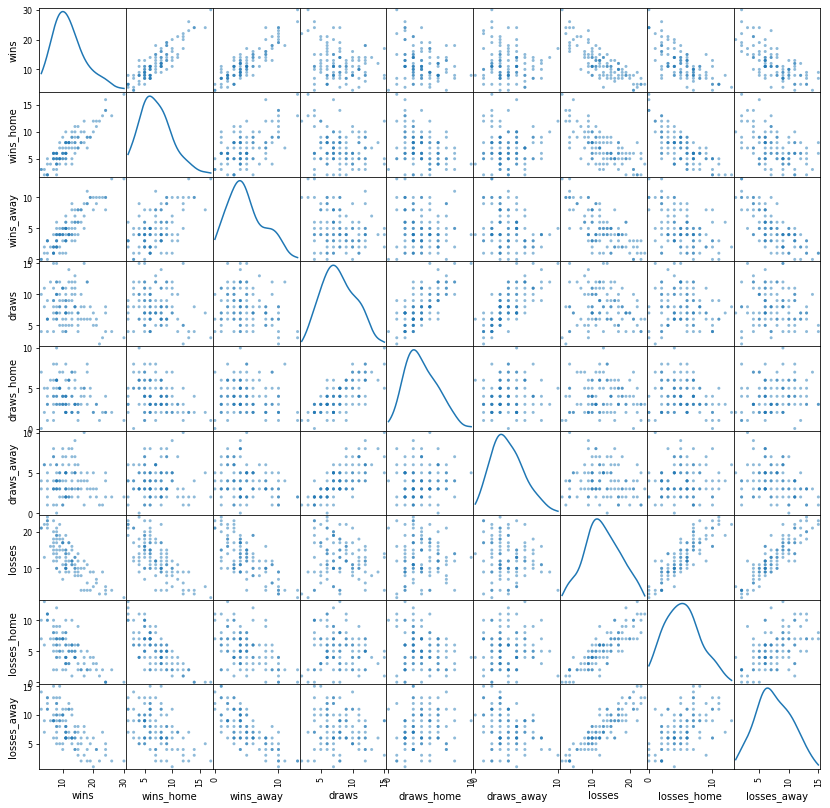

In [15]:
scatter_matrix(df_total[df_total.iloc[:,8:17].columns], diagonal='kde', figsize=(14,14));

## Build the matrix

In [16]:
df_all.set_index("team_name", inplace=True)
df_all = df_all.T

In [17]:
df_teams_numerical = df_all.iloc[8:,:]

In [18]:
df_norm = (df_teams_numerical - df_teams_numerical.min()) / (df_teams_numerical.max() - df_teams_numerical.min())

In [21]:
X = df_norm.to_numpy()

## AA Analysis

In [23]:
archetypal=cl.clustering.ArchetypalAnalysis(n_archetypes=5,iterations=50,tmax=300)
archetypal.fit(X)

Z=(archetypal.archetypes())

RSS = 4.122469945804433
RSS = 3.5424701217162426
RSS = 3.325422892495398
RSS = 3.2126110106029233
RSS = 3.1509081567197086
RSS = 3.1119574659960754
RSS = 3.0912493374197196
RSS = 3.082356901772329
RSS = 3.078032620651694
RSS = 3.076039534000125
RSS = 3.0747582159267566
RSS = 3.074228181849753
RSS = 3.0739240827661916
RSS = 3.073740477592212
RSS = 3.0736839525293616
RSS = 3.073774815423831
RSS = 3.0737100386864435
RSS = 3.0736418223135566
RSS = 3.0737247352291908
RSS = 3.0736852007696274
RSS = 3.0736839589781213
RSS = 3.0737131022186426
RSS = 3.0735571722886643
RSS = 3.0735786998962866
RSS = 3.0735938001670053
RSS = 3.07361368342306
RSS = 3.0735727845423173
RSS = 3.0736009337853405
RSS = 3.073561486233925
RSS = 3.0736304692609733
RSS = 3.073566242582977
RSS = 3.0736154416328074
RSS = 3.073576224813136
RSS = 3.0735856481074886
RSS = 3.0735583560167723
RSS = 3.073548778826353
RSS = 3.0735026173609197
RSS = 3.0735698141652086
RSS = 3.0735521563702957
RSS = 3.073558804121926
RSS = 3.0735177

In [24]:
sns.set(style='whitegrid', rc={'figure.figsize':(11.7,8.27)})
sns.set_context('talk', rc={ 'lines.linewidth': 6}, font_scale=1.5)

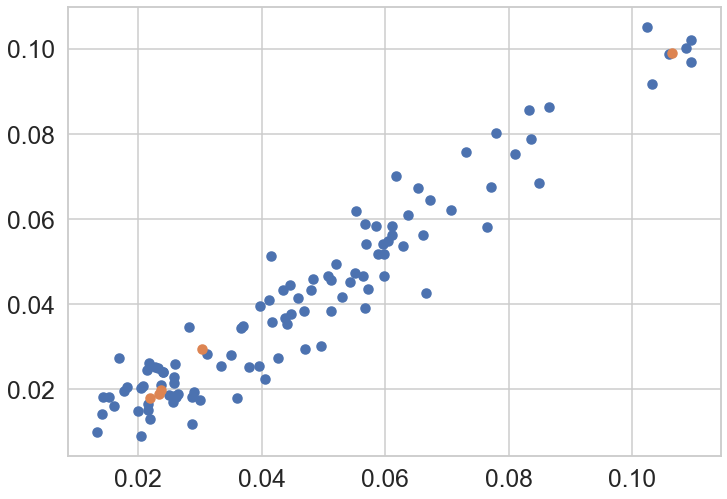

In [25]:
plt.scatter(X[0,:],X[1,:])
plt.scatter(np.array(Z[0,:]),np.array(Z[1,:]))
plt.show()

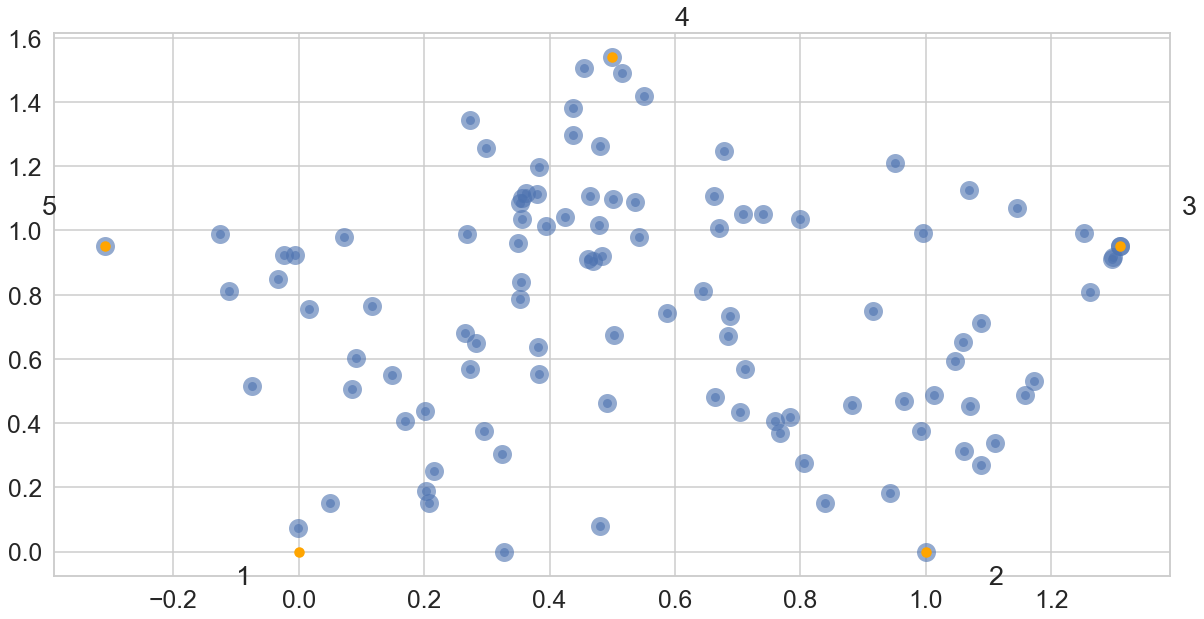

In [26]:
A=archetypal.transform(X)
dp=archetypal.map2D
dat=dp @ A

f, ax = plt.subplots(figsize=(20, 10))
ax=cl.clustering.archetypal_plot(ax,dat,dp,epsilon=.1)
ax.set_aspect('auto')
plt.show()

## Create data labels

In [27]:
teamsList = df_total['team_name']
temasColumnOrdering={x:y for y,x in enumerate(teamsList)}
labels={v: k for k, v in temasColumnOrdering.items()}

In [28]:
for i in range(0,104):
    print("{:40}".format(labels[i]),end='')
    for j in A[:,i]:
        print("{:.3f} ".format(j),end='')
    print("")

1. FC Köln                              0.284 0.425 0.291 0.000 0.000 
1. FC Union Berlin                      0.000 0.716 0.284 0.000 0.000 
1. FSV Mainz 05                         0.351 0.262 0.387 0.000 0.000 
BVB 09 Borussia Dortmund                0.902 0.000 0.000 0.098 0.000 
Bayer 04 Leverkusen                     0.937 0.000 0.000 0.023 0.040 
Borussia VfL Mönchengladbach            0.673 0.327 0.000 0.000 0.000 
Düsseldorfer TuS Fortuna 1895           0.153 0.162 0.686 0.000 0.000 
Eintracht Frankfurt                     0.841 0.000 0.158 0.000 0.000 
FC Augsburg                             0.266 0.254 0.480 0.000 0.000 
FC Bayern München                       0.294 0.000 0.000 0.706 0.000 
FC Schalke 04                           0.146 0.340 0.514 0.000 0.000 
Hertha BSC                              0.116 0.692 0.192 0.000 0.000 
Rasen Ballsport Leipzig                 0.823 0.000 0.141 0.036 0.000 
SC Freiburg                             0.541 0.000 0.212 0.000 0.247 
SC Pad

## Merge Result with original dataframe

In [29]:
df_aa_result = pd.DataFrame(data=A.T)
df_aa_result.columns = df_aa_result.columns.map(str)

In [30]:
df_teams_with_aa = pd.concat([df_total, df_aa_result], axis=1)
df_teams_only_aa = df_teams_with_aa.iloc[:,280:]
df_teams_only_aa['common_name'] = df_teams_with_aa['common_name']

In [31]:
df_teams_only_aa

,0,1,2,3,4,common_name
0,0.283987,0.424695,0.291318,0.000000,0.000000,Köln
1,0.000000,0.716368,0.283632,0.000000,0.000000,Union Berlin
2,0.351406,0.261550,0.386955,0.000089,0.000000,Mainz 05
3,0.901927,0.000000,0.000044,0.098029,0.000000,Borussia Dortmund
4,0.937276,0.000111,0.000089,0.022503,0.040022,Bayer Leverkusen
...,...,...,...,...,...,...
99,0.000000,0.150321,0.849679,0.000000,0.000000,Hannover 96
100,0.000000,0.041329,0.958671,0.000000,0.000000,Stuttgart
101,0.000000,0.523743,0.428571,0.000000,0.047685,Hamburger SV
102,0.000000,0.487663,0.512337,0.000000,0.000000,Darmstadt 98


## Save Result as Pickle file

In [29]:
df_teams_only_aa.to_pickle("pickle_files/df_teams_only_aa.pkl")